# Tensorflow Data Example: IMDB 
https://www.tensorflow.org/datasets/catalog/imdb_reviews

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

from scipy import stats

In [4]:
dataset, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train[:80%]", "train[80%:]", "test"],
    as_supervised=True,
    with_info=True,
)

dataset_train_original = dataset[0]
dataset_validate_original = dataset[1]
dataset_test_original = dataset[2]

In [5]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/home/sam/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [4]:
dataset_train_original # this is a data stream

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
for x, y in dataset_train_original.take(3):
    print(x.numpy().decode("utf-8"))
    print(y.numpy())
    print("")

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was c

2022-05-06 09:57:08.239206: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


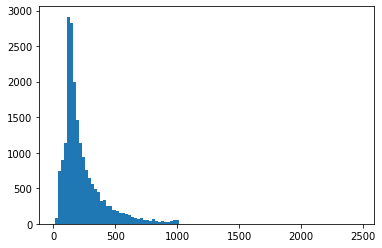

In [8]:
length = []
for review, _ in dataset_train_original:
    review = review.numpy().decode("utf-8")
    words = review.split()
    length += [len(words)]

plt.hist(length, bins=100)
plt.show()

In [9]:
print("Min    ", np.min(length))
print("Mean   ", np.mean(length))
print("Median ", np.median(length))
print("Modus  ", float(stats.mode(length)[0]))
print("STD    ", np.std(length))
print("Max    ", np.max(length))

Min     10
Mean    233.912
Median  174.0
Modus   123.0
STD     173.81097104613391
Max     2470


### Bag of Words Encoding

#### Define Encoder

In [18]:
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot",
)

encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(2040)) # ???

In [13]:
vocabulary = encoder.get_vocabulary()

In [14]:
" ".join(vocabulary[:50])

'[UNK] the and a of to is in it i this that br was as for with movie but film on not you his are have be he one its at all by an they who from so like her or just about if has out some there what good'

In [15]:
text = "Hello World, this is some interesting but random text. the"
text_encoded = encoder(text)
text_encoded = [str(int(x)) for x in text_encoded]
text_encoded = "".join(text_encoded)

In [17]:
#text_encoded

In [13]:
for x, y in dataset_train_original.take(8):
    x_encoded = encoder(x)
    print(x_encoded)
    print(y)

tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(10000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


In [14]:
dataset_train = dataset_train_original.cache()
dataset_train = dataset_test_original.shuffle(20_000)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.cache()
dataset_validate = dataset_validate_original.batch(128)

for x, y in dataset_train.take(1):
    print(x.shape)
    print(y.shape)

(128,)
(128,)


2022-05-04 14:30:48.356344: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [15]:
encoder(x)

<tf.Tensor: shape=(128, 10000), dtype=float32, numpy=
array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)>

In [16]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(12, activation="relu")) # relu is a good start for a first layer
# model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid")) # !!ATTENTION!!: softmax leads always to 1 (???)

# model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=5,
    validation_data=dataset_validate,
)

Epoch 1/5
196/196 [==============================] - 3s 11ms/step - loss: 0.3860 - accuracy: 0.8536 - val_loss: 0.2933 - val_accuracy: 0.8872
Epoch 2/5
196/196 [==============================] - 2s 10ms/step - loss: 0.2129 - accuracy: 0.9204 - val_loss: 0.2911 - val_accuracy: 0.8892
Epoch 3/5
196/196 [==============================] - 2s 10ms/step - loss: 0.1644 - accuracy: 0.9414 - val_loss: 0.3047 - val_accuracy: 0.8850
Epoch 4/5
196/196 [==============================] - 2s 10ms/step - loss: 0.1339 - accuracy: 0.9542 - val_loss: 0.3390 - val_accuracy: 0.8766
Epoch 5/5
196/196 [==============================] - 2s 10ms/step - loss: 0.1127 - accuracy: 0.9630 - val_loss: 0.3610 - val_accuracy: 0.8740


In [17]:
model.predict(["best movie I have ever seen. All actors were brilliant."])

array([[0.7718624]], dtype=float32)

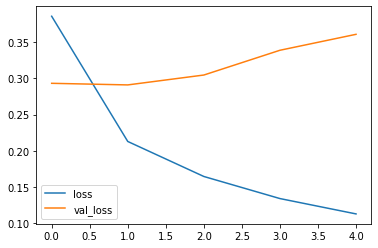

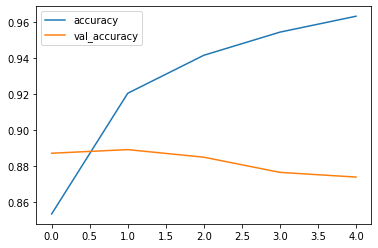

In [18]:
def render_history(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()
    
render_history(history)

## Word Embedding with Word Vector

#### Define Encoder

In [50]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
)

encoder.adapt(dataset_train_original.map(lambda text, label: text).batch(512))


#### Define Neural Network

In [30]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32)) # Maps the encoder-output (128) to ???
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=5,
    validation_data=dataset_validate,
)

model.summary()


Epoch 1/5
196/196 [==============================] - 6s 29ms/step - loss: 0.4948 - accuracy: 0.7368 - val_loss: 0.3957 - val_accuracy: 0.8244
Epoch 2/5
196/196 [==============================] - 6s 28ms/step - loss: 0.1678 - accuracy: 0.9350 - val_loss: 0.5121 - val_accuracy: 0.8032
Epoch 3/5
196/196 [==============================] - 6s 29ms/step - loss: 0.0217 - accuracy: 0.9951 - val_loss: 0.7433 - val_accuracy: 0.8034
Epoch 4/5
196/196 [==============================] - 6s 29ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.8483 - val_accuracy: 0.8040
Epoch 5/5
196/196 [==============================] - 6s 29ms/step - loss: 5.5917e-04 - accuracy: 1.0000 - val_loss: 0.8956 - val_accuracy: 0.8048
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_4 (TextV  (None, 128)              0         
 ectorization)                                                   


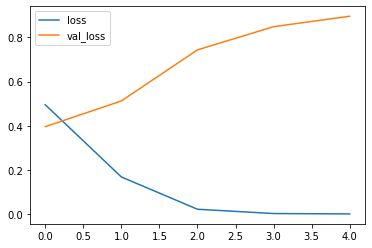

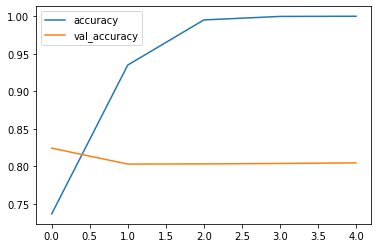

In [32]:
render_history(history)

In [48]:
vocabulary = encoder.get_vocabulary()
print(len(vocabulary))
print(vocabulary[:12])
encoder("This is a test")

10000
['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this']


<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([  11,    7,    4, 2104,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])>

In [56]:
vocabulary.index("batman")

1323